<a href="https://colab.research.google.com/github/mayorofdata/CiFAR-10-Images-Classification-Using-CNNs/blob/master/CiFAR_10_Images_Classification_Using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification of Images (CIFAR-10) using CNNs
### Problem Statement
- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks


- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


**The following steps are followed for the Classification:**
- Step 1: Import Libraries and datasets
- Step 2: Visualize Dataset
- Step 3: Data Preparation
- Step 4: Train the model
- Step 5: Model Evaluation
- Step 6: Saving the model
- Step 7: Model training using Augmented CIFAR-10 dataset

# STEP #1: IMPORT LIBRARIES AND DATASETS

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [143]:
X_train.shape

(50000, 32, 32, 3)

In [144]:
X_test.shape

(10000, 32, 32, 3)

In [145]:
y_train.shape

(50000, 1)

In [146]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATASET

[9]


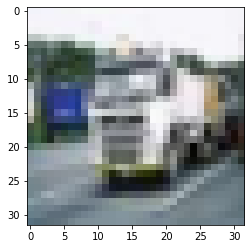

In [147]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


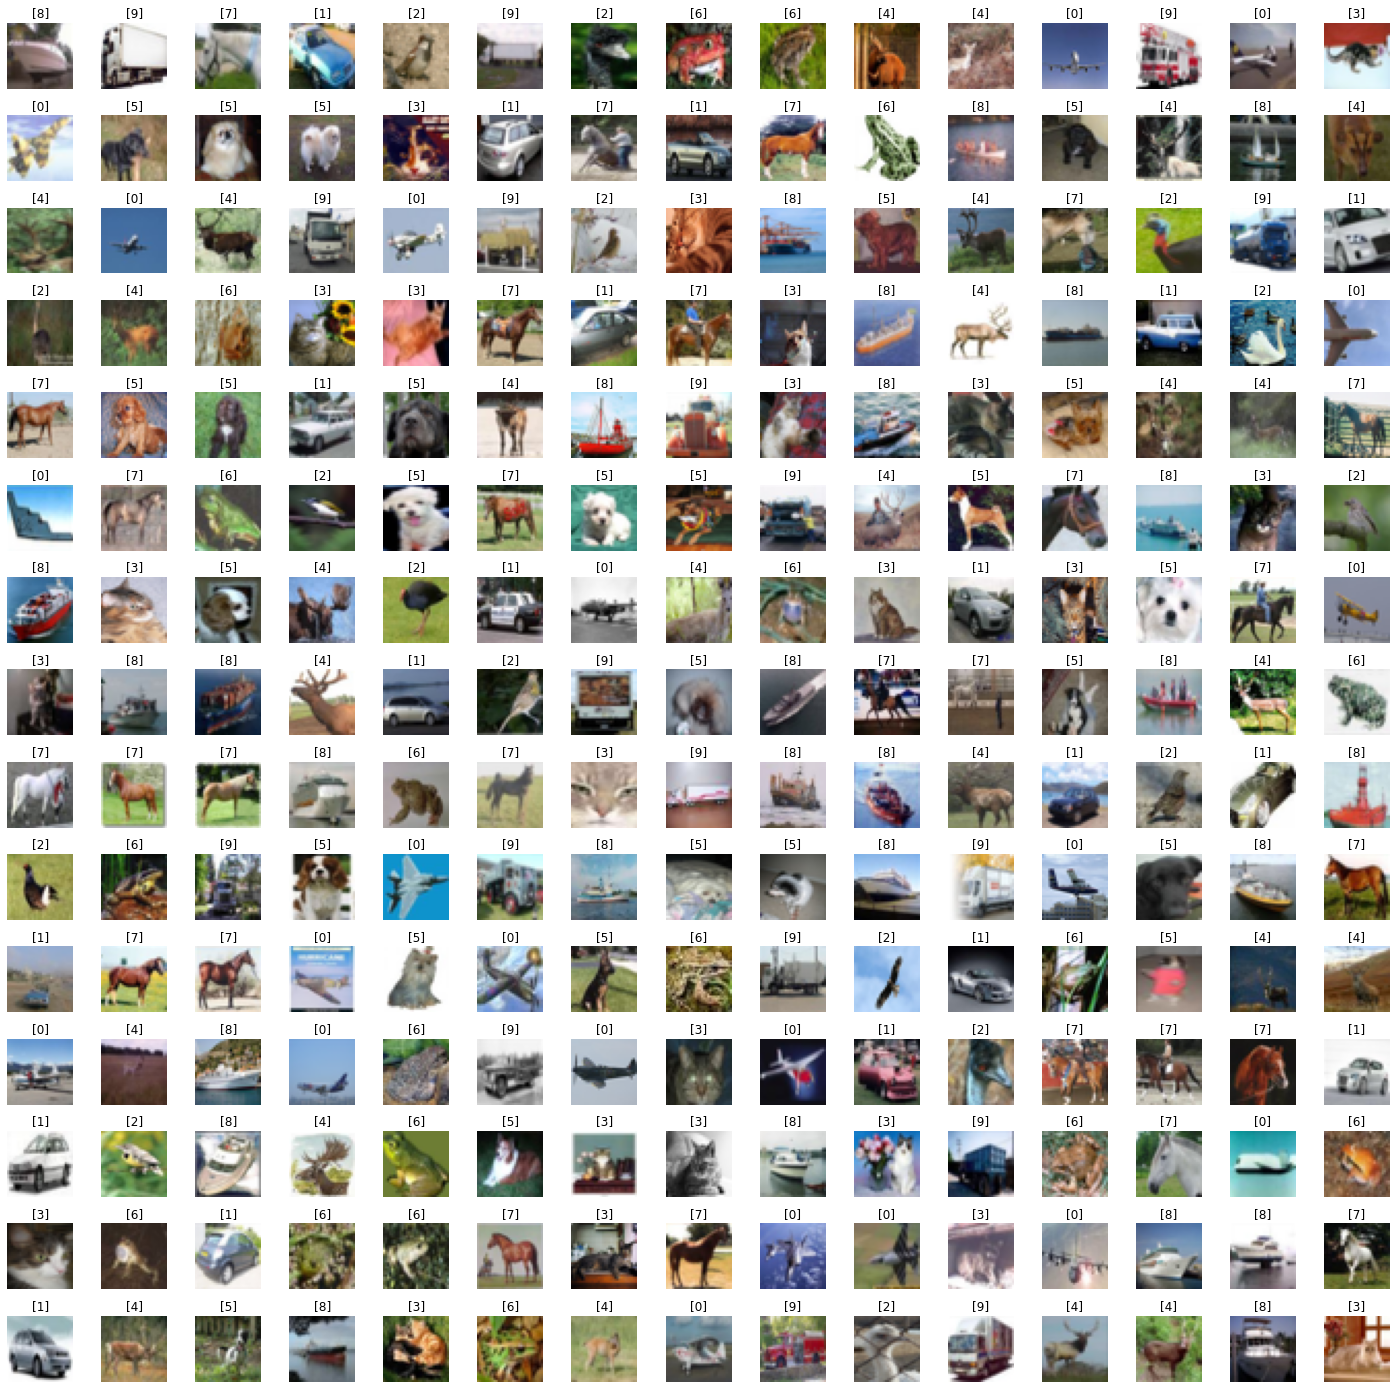

In [148]:
 W_grid = 15
 L_grid = 15

 fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
 axes = axes.ravel()

 n_training = len(X_train)

 for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [149]:
n_training

50000

# STEP #3: DATA PREPARATION

In [150]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [151]:
number_cat = 10

In [152]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [153]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [154]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [155]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [156]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [157]:
X_train = X_train/255
X_test = X_test/255

In [158]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [159]:
X_train.shape

(50000, 32, 32, 3)

In [160]:
Input_shape = X_train.shape[1:]

In [161]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [162]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [163]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size= (3,3), activation= 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size= (3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size= (3,3), activation= 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size= (3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [164]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [165]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle= True)

1563/1563 [==============================] - 534s 342ms/step - loss: 1.6150 - accuracy: 0.4184


# STEP #5: MODEL EVALUATION 

In [166]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 26s 83ms/step - loss: 1.4357 - accuracy: 0.5098
Test Accuracy: 0.5098000168800354


In [167]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 4, 7])

In [168]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [169]:
y_test = y_test.argmax(1)

In [170]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

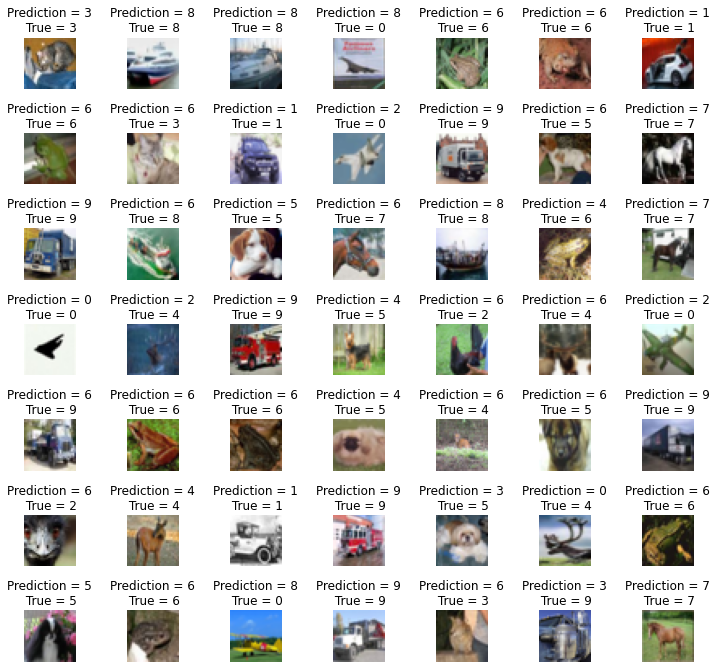

In [171]:
L = 7
W = 7
fig, axes = plt.subplots(L,W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'. format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

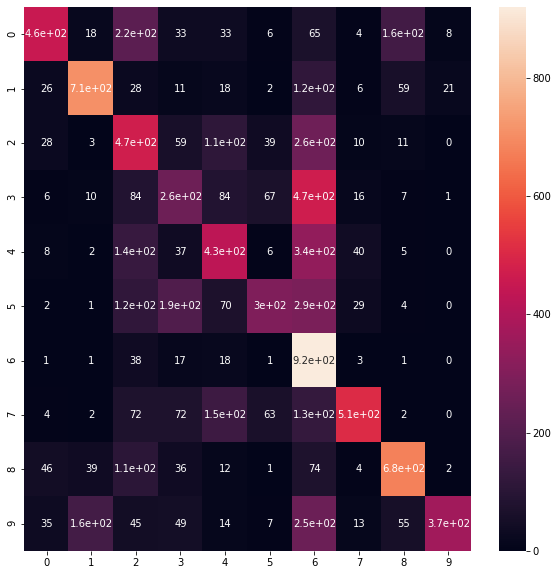

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm= confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL 

In [173]:
from google.colab import drive
drive.mount('/content/drive')

model_save_name = 'keras_cifar10_trained_model.h5'
model_path = F"/content/drive/My Drive/Colab Notebooks/{model_save_name}"
cnn_model.save(model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
# Saving into local directory
# import os
# directory = os.path.join(os.getcwd(), "saved_models")

# if not os.path.isdir(directory):
#     os.makedirs(directory)
# model_path = os.path.join(directory, "keras_cifar10_trained_model.h5")
# cnn_model.save(model_path)

# STEP #7: MODEL TRAINING USING AUGEMENTED DATASET 
- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

In [175]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [176]:
datagen.fit(X_train)

In [177]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 550s 352ms/step - loss: 1.7794 - accuracy: 0.3642
Epoch 2/2
1563/1563 [==============================] - 548s 351ms/step - loss: 1.6596 - accuracy: 0.4067


In [182]:
# score = cnn_model.evaluate(X_test, y_test)
# print('Test accuracy', score[1])

In [183]:
model_save_name = 'keras_cifar10_trained_model_Aug.h5'
model_path = F"/content/drive/My Drive/Colab Notebooks/{model_save_name}"
cnn_model.save(model_path)